### Import the libraries

In [25]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

### Dataset

Either download the dataset from Kaggle ([link](https://www.kaggle.com/competitions/titanic/data?select=train.csv)) and use the train.csv or import it with the following line:

In [26]:
!wget -O titanic.csv https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j&dl=0

zsh:1: no matches found: https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j


In [27]:
# Load and view the Titanic dataset (assuming you have the CSV file)
df = pd.read_csv('./train.csv')

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
# Get a summary of the dataset with .info

df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [29]:
# Get some statistics for numerical columns

numerical_columns = df.select_dtypes(include=['number'])
numerical_columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [30]:
# Count the number of missing/null values in each column

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

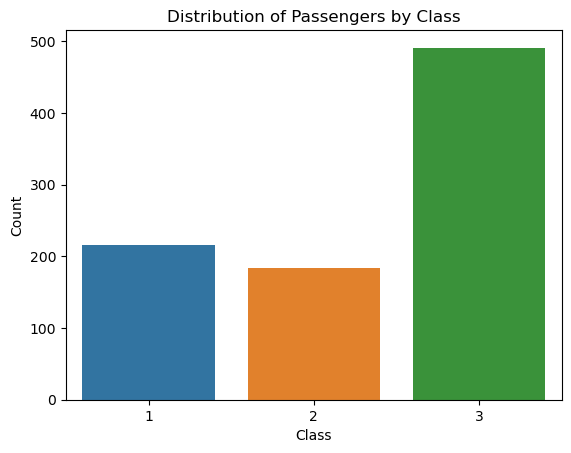

In [31]:
sns.countplot(x='Pclass', data=df)

plt.title('Distribution of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

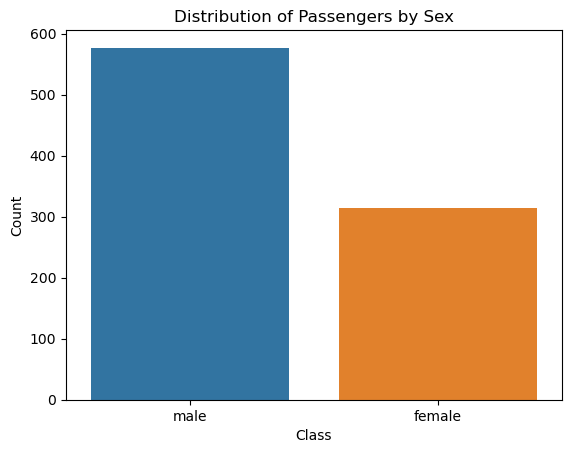

In [32]:
# Visualize the distribution of passengers by gender using the countplot by seaborn
sns.countplot(x='Sex', data=df)

plt.title('Distribution of Passengers by Sex')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

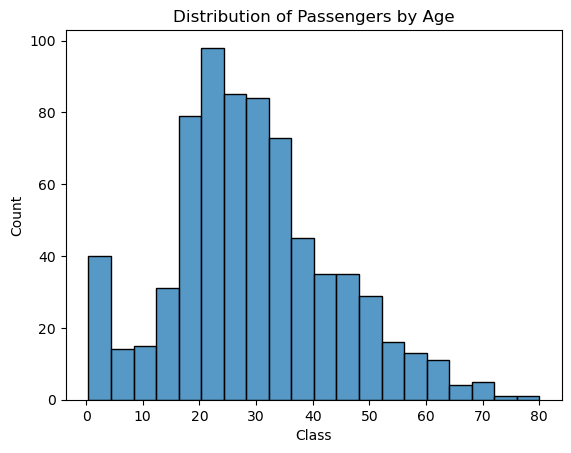

In [33]:
# Visualize the age distribution of passengers using histplot
# Visualize the distribution of passengers by gender using the countplot by seaborn
sns.histplot(x='Age', data=df)

plt.title('Distribution of Passengers by Age')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

/Users/lizhifan/miniconda3/envs/myenv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


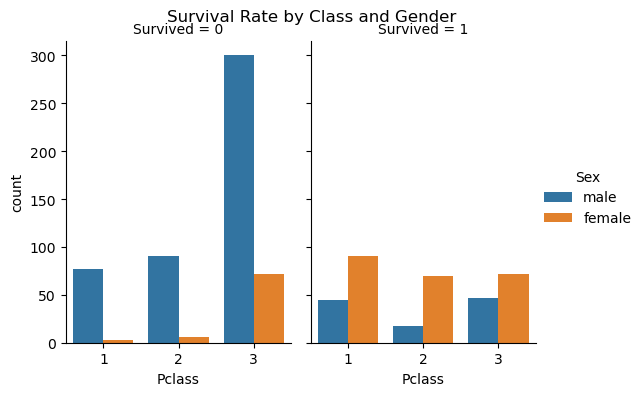

In [34]:
# Visualize the survival rate by class and gender using catplot
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count', height=4, aspect=.7)

plt.subplots_adjust(top=0.9)
plt.suptitle('Survival Rate by Class and Gender')
plt.show()

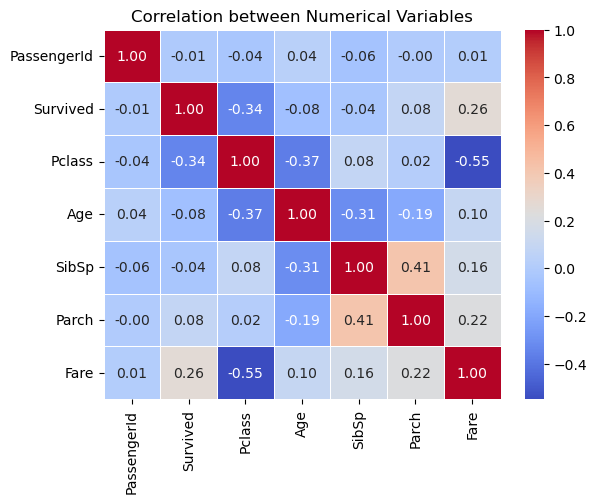

In [35]:
# Visualize the correlation between numerical variables
corr = df.select_dtypes(include=['number']).corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation between Numerical Variables')
plt.show()

In [36]:
# select only the following features and save the new dataset into titanic_df
# [['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titanic_df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

titanic_df
# drop all nulls
titanic_df.dropna()



,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,0
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
889,1,male,26.0,0,0,30.0000,1


In [37]:
#check null values again to make sure everything null is dropped
titanic_df.isnull().sum()


Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [38]:
# check the data types
titanic_df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

In [39]:
# Convert categorical variables (e.g., 'Sex') to numerical using one-hot encoding


titanic_df = pd.get_dummies(titanic_df, columns=['Sex'], drop_first=True)
titanic_df

titanic_df.dropna(inplace=True)

In [40]:
# Split data into features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']


In [41]:
# Split the data into training and testing sets. Use 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling using StandardScaler(optional but recommended)
scaler = StandardScaler()

X_train_scaled = scaler.fit(X_train).transform(X_train)
    
# TODO: Transform validation set with learned scaler
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled



In [42]:
# Create an SVM classifier
svm = SVC(C=50, gamma=0.009)

# Fit the SVM model to the training data

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)


In [43]:
# build a function that prints accuracy score, classification report,
# and the confusion matrix
def evaluate_model(y_test, preds):
    """
    create metrics for evaluating each model
    """

    # calculate accuracy score
    acc = accuracy_score(y_test, preds)

    # create classification report
    classification_repo = classification_report(y_test, preds)

    # confusion matrix
    cm = confusion_matrix(y_test, preds)

    # Evaluate the model
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_repo)
    print("Confusion Matrix:\n", cm)


In [44]:
# Predict on the test data and store it in y_pred_svm
y_pred_svm = svm.predict(X_test)

# evaluate
evaluate_model(y_test, y_pred_svm)

Accuracy: 0.813953488372093
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       125
           1       0.82      0.71      0.76        90

    accuracy                           0.81       215
   macro avg       0.82      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215

Confusion Matrix:
 [[111  14]
 [ 26  64]]


In [45]:
# create a decision tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

# predict on all data

pred_tree = decision_tree.predict(X_test)

# undo log-transform

# fit the tree
# store the prediction in y_pred_dt
y_pred_dt = pred_tree

In [46]:
# evaluate the model
price_tree = np.exp(pred_tree)
# price_tree

In [47]:
from sklearn.ensemble import RandomForestClassifier

# build a random forest model with 100 n_estimators
model = RandomForestClassifier(n_estimators=100)

# fit the model
model.fit(X_train, y_train)

# store the predictions inside y_pred_rf
y_pred_rf = model.predict(X_test)

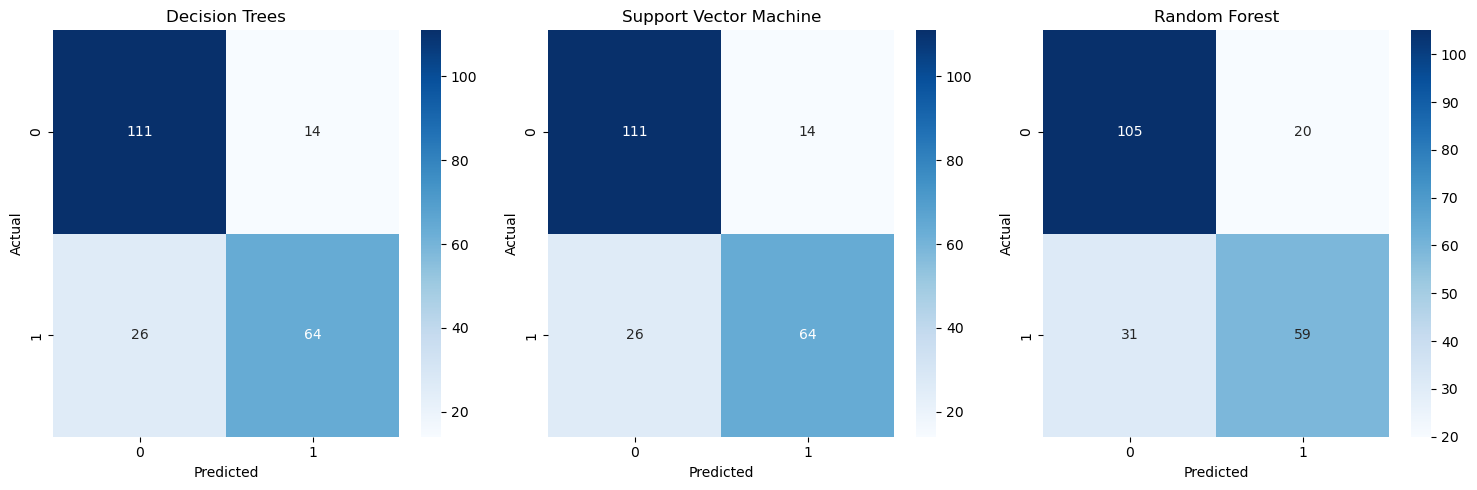

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test, y_pred_dt, y_pred_svm, y_pred_rf are already defined
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Set up subplots for each confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create a heatmap for Decision Trees
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Trees')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Create a heatmap for SVM
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Support Vector Machine')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Create a heatmap for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


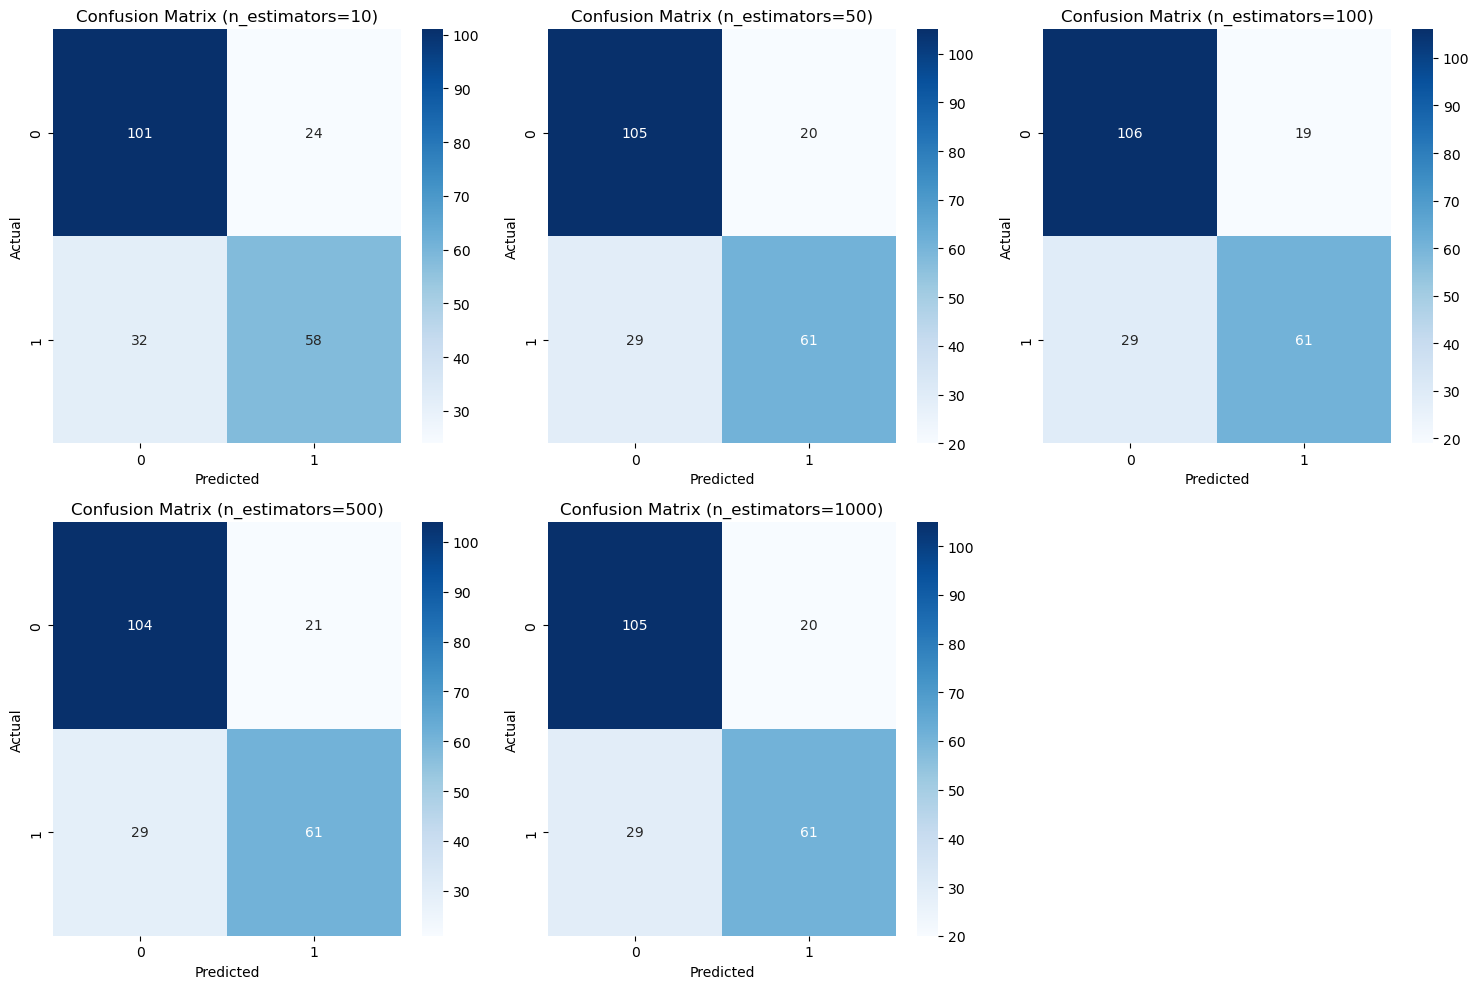

In [52]:
# try to change the number of trees in random forest and see what happens

# Define a range of values for the number of trees (n_estimators) (e.g., 10, 50, 100)
n_estimators_values = [10, 50, 100, 500, 1000]

# **** Don't change anything below but understand how it works! ****
# Lists to store confusion matrices for different n_estimators values
confusion_matrices = []

# Loop through different n_estimators values
for n_estimators in n_estimators_values:
    # Create and train the Random Forest model
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_rf = rf.predict(X_test)

    # Calculate the confusion matrix and store it in the list
    cm = confusion_matrix(y_test, y_pred_rf)
    confusion_matrices.append(cm)

# Plot the confusion matrices using heatmaps
plt.figure(figsize=(15, 10))
for i, n_estimators in enumerate(n_estimators_values):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (n_estimators={n_estimators})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


### Optional - Grid search

Grid Search is a technique used in machine learning to find the best hyperparameters for a machine learning model. It's a systematic method of searching through a range of hyperparameter values to find the combination that results in the best model performance. Grid Search is particularly useful for models with hyperparameters that significantly impact model performance, such as Support Vector Machines (SVMs) with different kernel functions and regularization parameters.

GridSearchCV will try all possible combinations of hyperparameters in the specified parameter grid and choose the combination that results in the best cross-validated performance. This way, you can create an optimized SVC model for your specific dataset.

Keep in mind that Grid Search can be computationally expensive, especially with a large parameter grid. In such cases, you may want to consider other techniques like Randomized Search or Bayesian Optimization to efficiently explore the hyperparameter space.

In [ ]:

# Define a parameter grid for each model
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1]
}

rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a function to perform grid search and return the best model
def tune_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return best_params, best_model, accuracy

# Example usage with your data
svc_best_params, svc_best_model, svc_accuracy = tune_and_evaluate_model(SVC(), svc_param_grid, X_train, y_train, X_test, y_test)
rf_best_params, rf_best_model, rf_accuracy = tune_and_evaluate_model(RandomForestClassifier(), rf_param_grid, X_train, y_train, X_test, y_test)
dt_best_params, dt_best_model, dt_accuracy = tune_and_evaluate_model(DecisionTreeClassifier(), dt_param_grid, X_train, y_train, X_test, y_test)

# Print the results
print("SVC Best Parameters:", svc_best_params)
print("SVC Accuracy:", svc_accuracy)
print("\nRandom Forest Best Parameters:", rf_best_params)
print("Random Forest Accuracy:", rf_accuracy)
print("\nDecision Tree Best Parameters:", dt_best_params)
print("Decision Tree Accuracy:", dt_accuracy)
